In [1]:
import numpy as np 
import pandas as pd 

In [2]:
column_names = ['pregnant_count',
                'plasma_glucose',
                'bp',
                'skin_thickness',
                'insulin',
                'bmi',
                'dpf',
                'age',
                'label']

df = pd.read_csv('pima-indians-diabetes.csv',names=column_names, header=None)

In [3]:
df.head()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail(5)

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe()

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking for null values
df.isna().sum()

pregnant_count    0
plasma_glucose    0
bp                0
skin_thickness    0
insulin           0
bmi               0
dpf               0
age               0
label             0
dtype: int64

In [7]:
print("Length of dataset before removing duplicates:", len(df))

# Removing duplicate rows
df = df.drop_duplicates()

print("Length of dataset after removing duplicates:", len(df))

Length of dataset before removing duplicates: 768
Length of dataset after removing duplicates: 768


In [8]:
# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
column_names

['pregnant_count',
 'plasma_glucose',
 'bp',
 'skin_thickness',
 'insulin',
 'bmi',
 'dpf',
 'age',
 'label']

<AxesSubplot:xlabel='age', ylabel='bp'>

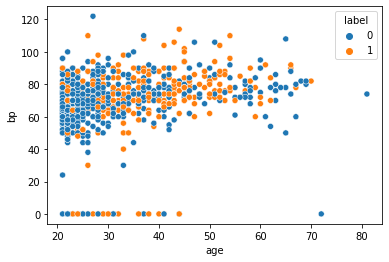

In [10]:
# scatter plot age vs bp
sns.scatterplot(x='age', y='bp', hue='label', data=df)

<AxesSubplot:>

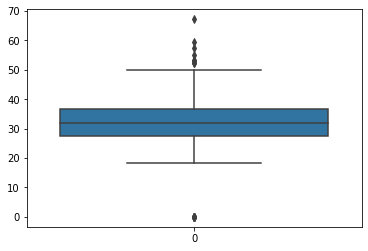

In [11]:
# boxplot of bmi
sns.boxplot(data=df['bmi'])

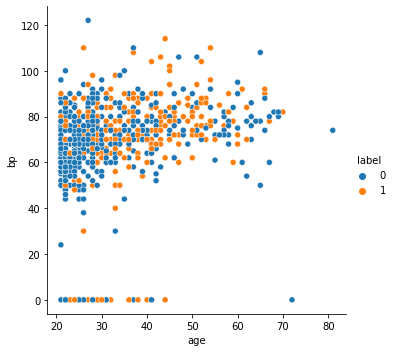

In [12]:
# relational plot between age and bp
sns.relplot(x='age', y='bp', data=df, hue='label')

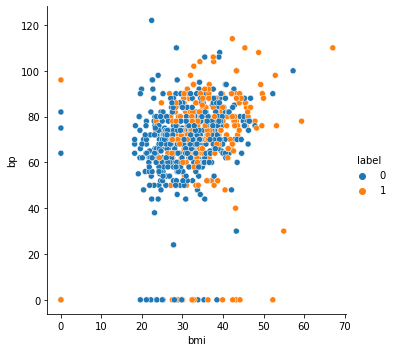

In [13]:
sns.relplot(x='bmi', y='bp', data=df, hue='label')

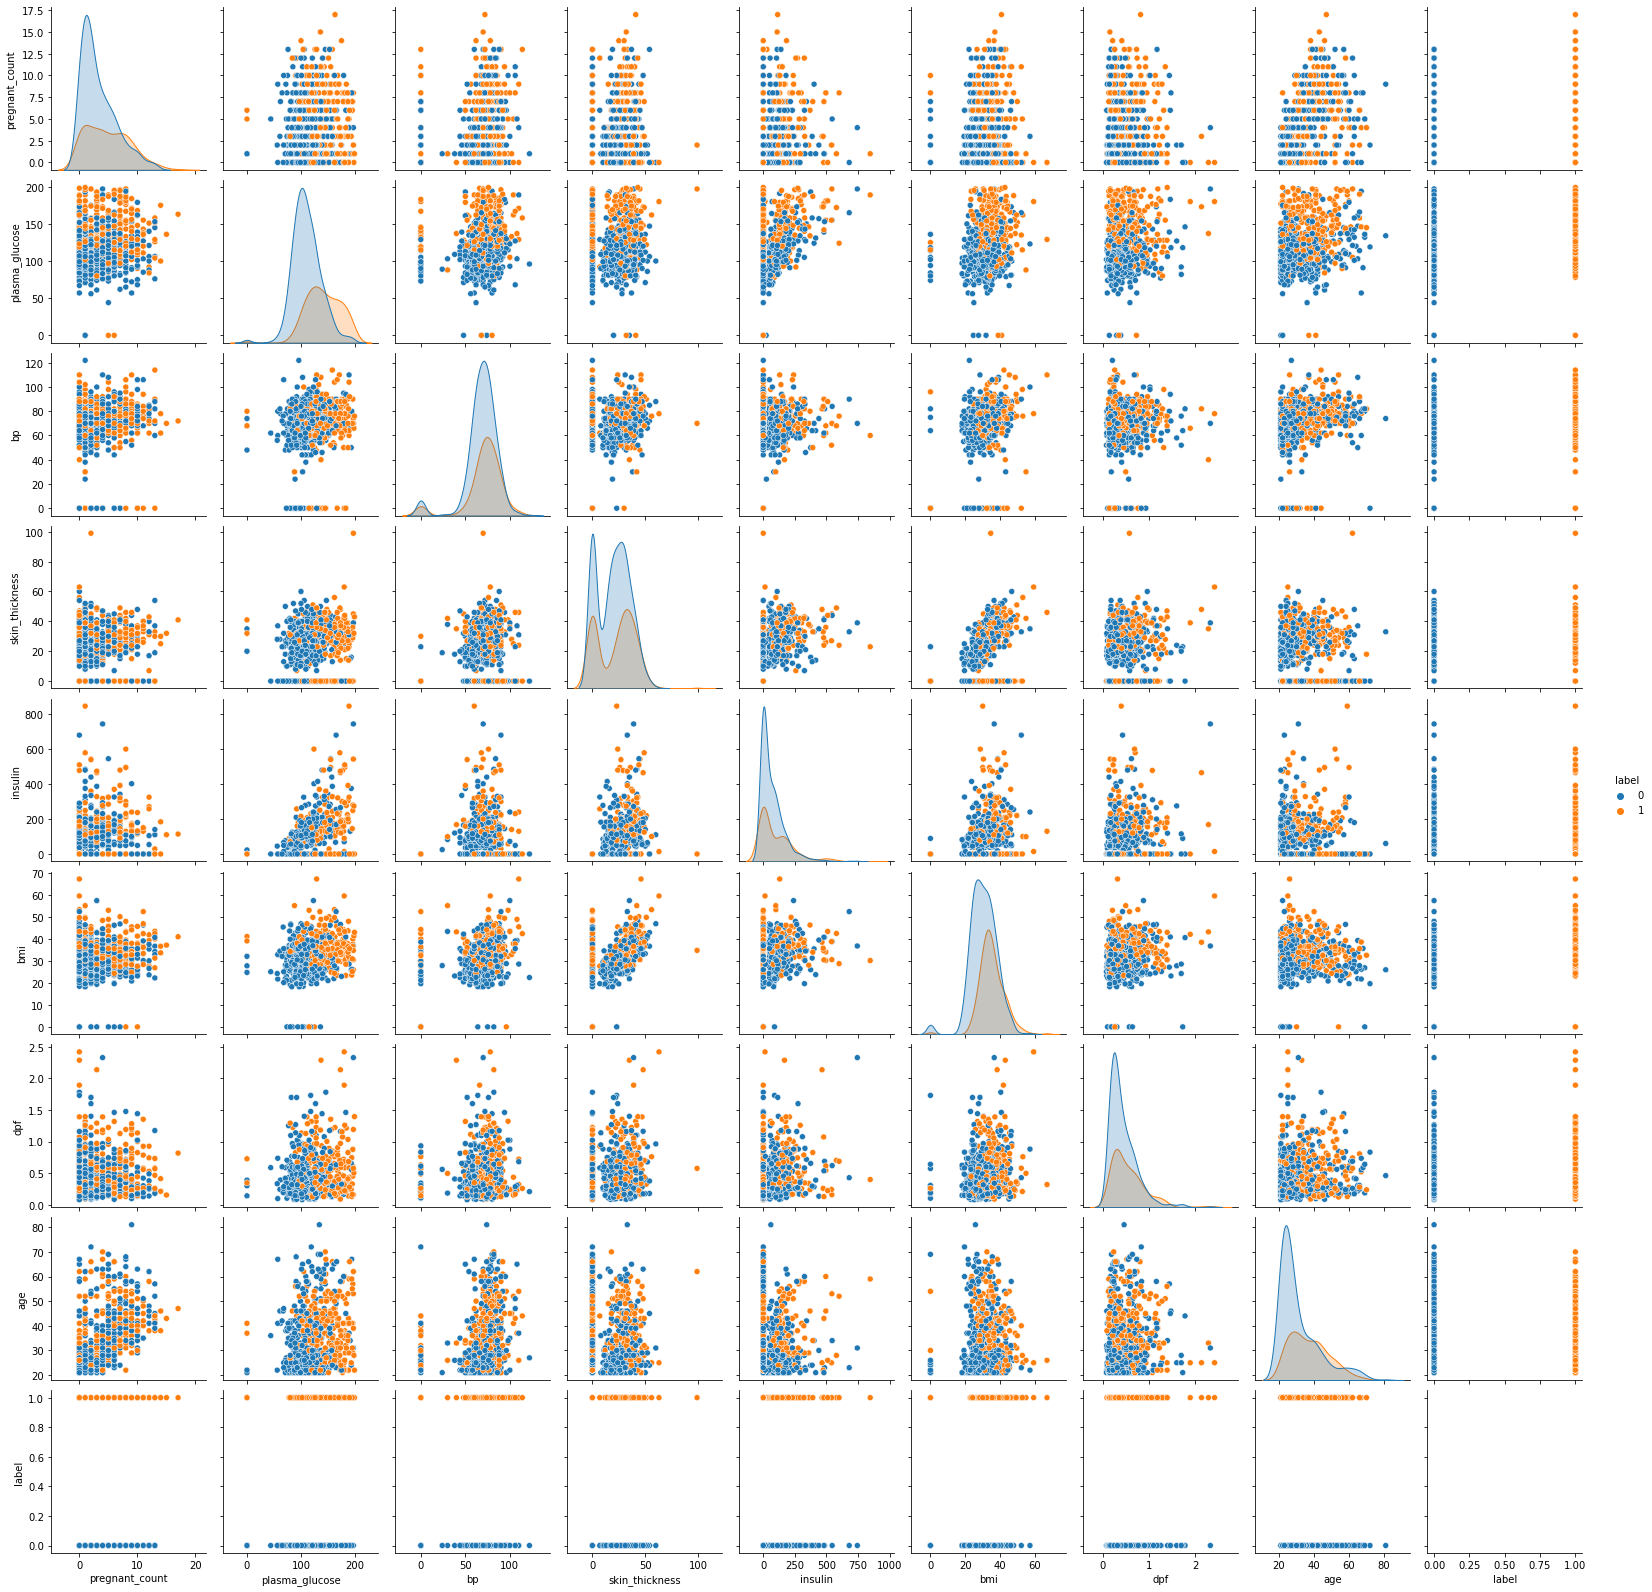

In [14]:
# pairplot between every parameters
sns.pairplot(df, hue='label', vars=column_names)

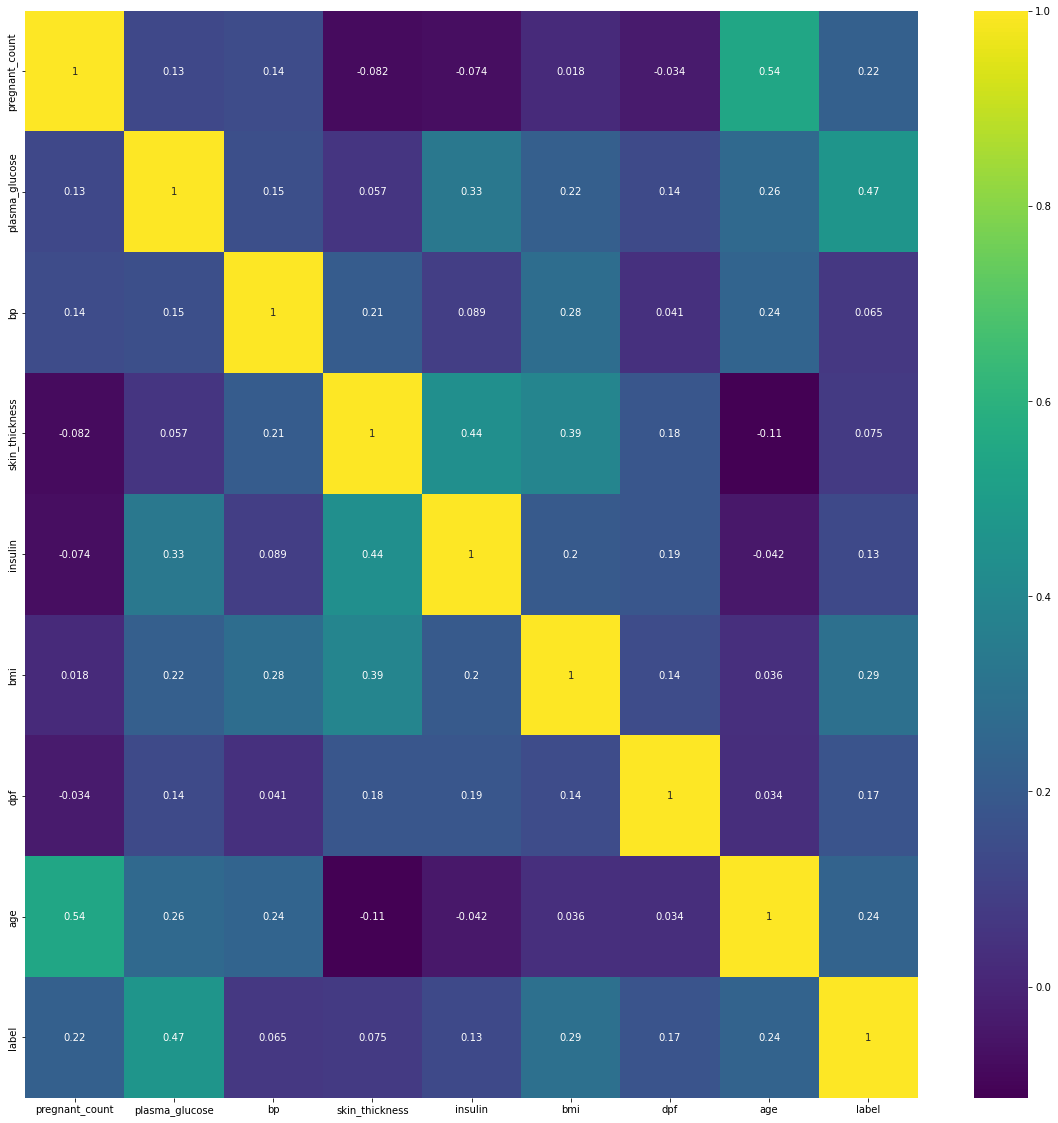

In [15]:
# Heatmap of the d
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [16]:
# Splitting of Dataset 
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop('label', axis=1)
y = df['label']
X

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# normalize columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# train model linear regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

[[80 19]
 [18 37]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



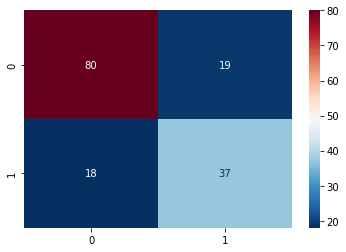

In [21]:
# predict for linear regression and plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = linear_model.predict(X_test_scaled)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu_r')
plt.show()

In [22]:
# train model logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

[[84 15]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



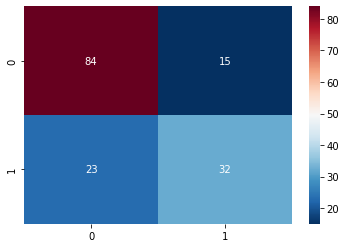

In [23]:
# predict for logistic regression and plot confusion matrix
y_pred = logistic_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdBu_r')
plt.show()